In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
data = pd.read_excel('House_Rent_Train.xlsx')
data.sample(10)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
10720,ff8081815cee9dbf015cef798b14214e,BHK3,Annapurneshwari Nagar,2018-10-01 21:57:00,12.977327,77.501541,ANYONE,0.0,0.0,0.0,...,3.0,E,3.0,2.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,5.0,17000.0
10244,ff80818162e6a3300162f0efd8276384,BHK2,"Sangeeta Topaz, Hoodi, Bengaluru, Karnataka, I...",23-04-2018 14:02,12.989211,77.715397,FAMILY,0.0,0.0,0.0,...,2.0,N,7.0,2.0,4.0,"{""SC"":true,""INTERCOM"":true,""AC"":false,""PB"":tru...",CORPORATION,AP,3.0,23000.0
7326,ff80818153d5d5b70153e00a5cce0c4c,BHK2,Murugesh Pallya,2018-08-02 19:47:00,12.959188,77.656335,ANYONE,0.0,0.0,0.0,...,2.0,N,2.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0.0,24000.0
1436,ff808181641c39eb01641cbf32fe6b78,BHK2,Kaggadasapura,22-06-2018 11:09,12.976973,77.670153,ANYONE,0.0,0.0,0.0,...,1.0,E,0.0,1.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IF,0.0,13000.0
2299,ff8081816035b49201604440a4536d0c,BHK2,Koramangala,2017-11-12 16:04:00,12.934838,77.612270,FAMILY,1.0,1.0,0.0,...,2.0,E,2.0,0.0,7.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":t...",CORP_BORE,AP,0.0,35000.0
18569,ff808181630c64f00163108121861e3e,BHK2,Panathur,29-04-2018 15:47,12.934903,77.702967,FAMILY,0.0,1.0,0.0,...,2.0,E,6.0,4.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",BOREWELL,AP,2.0,25000.0
4541,ff808181592254fb0159252d951f24ff,BHK3,Ejipura,16-06-2018 21:04,12.933155,77.636593,ANYONE,0.0,1.0,1.0,...,3.0,SW,3.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,IF,3.0,38000.0
18370,ff808181523600dd015236198a920101,RK1,Marathahalli,2018-09-02 15:24:00,12.950288,77.699063,ANYONE,0.0,0.0,0.0,...,1.0,E,0.0,3.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0.0,8500.0
13038,ff808181550b5f7b01550bcec08a0e03,BHK1,J P Nagar,2017-07-11 12:54:00,12.900169,77.585651,ANYONE,0.0,0.0,0.0,...,1.0,N,2.0,3.0,4.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.0,9500.0
2859,ff8081815fcf9c0a015fd26cd4b74d3f,BHK3,Kumaraswamy Layout,19-11-2017 15:01,12.908354,77.561678,ANYONE,0.0,0.0,0.0,...,2.0,N,0.0,2.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.0,14000.0


In [3]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
0,12.934471,77.634471,1.0,1.0,1.0,0.0,1250.0,25.0,2.0,2.0,6.0,12.0,2.0,40000.0
1,12.929557,77.672280,0.0,1.0,0.0,1.0,1400.0,4.0,2.0,2.0,3.0,4.0,2.0,22000.0
2,12.982870,80.262012,0.0,1.0,0.0,0.0,1350.0,6.0,3.0,3.0,1.0,5.0,3.0,28000.0
3,12.955991,77.531634,0.0,0.0,0.0,1.0,600.0,3.0,1.0,1.0,1.0,2.0,0.0,8000.0
4,12.963903,77.649446,0.0,0.0,0.0,1.0,1500.0,15.0,3.0,4.0,0.0,0.0,1.0,45000.0


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'gym'}>,
        <AxesSubplot:title={'center':'lift'}>],
       [<AxesSubplot:title={'center':'swimming_pool'}>,
        <AxesSubplot:title={'center':'negotiable'}>,
        <AxesSubplot:title={'center':'property_size'}>,
        <AxesSubplot:title={'center':'property_age'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'cup_board'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'total_floor'}>],
       [<AxesSubplot:title={'center':'balconies'}>,
        <AxesSubplot:title={'center':'rent'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

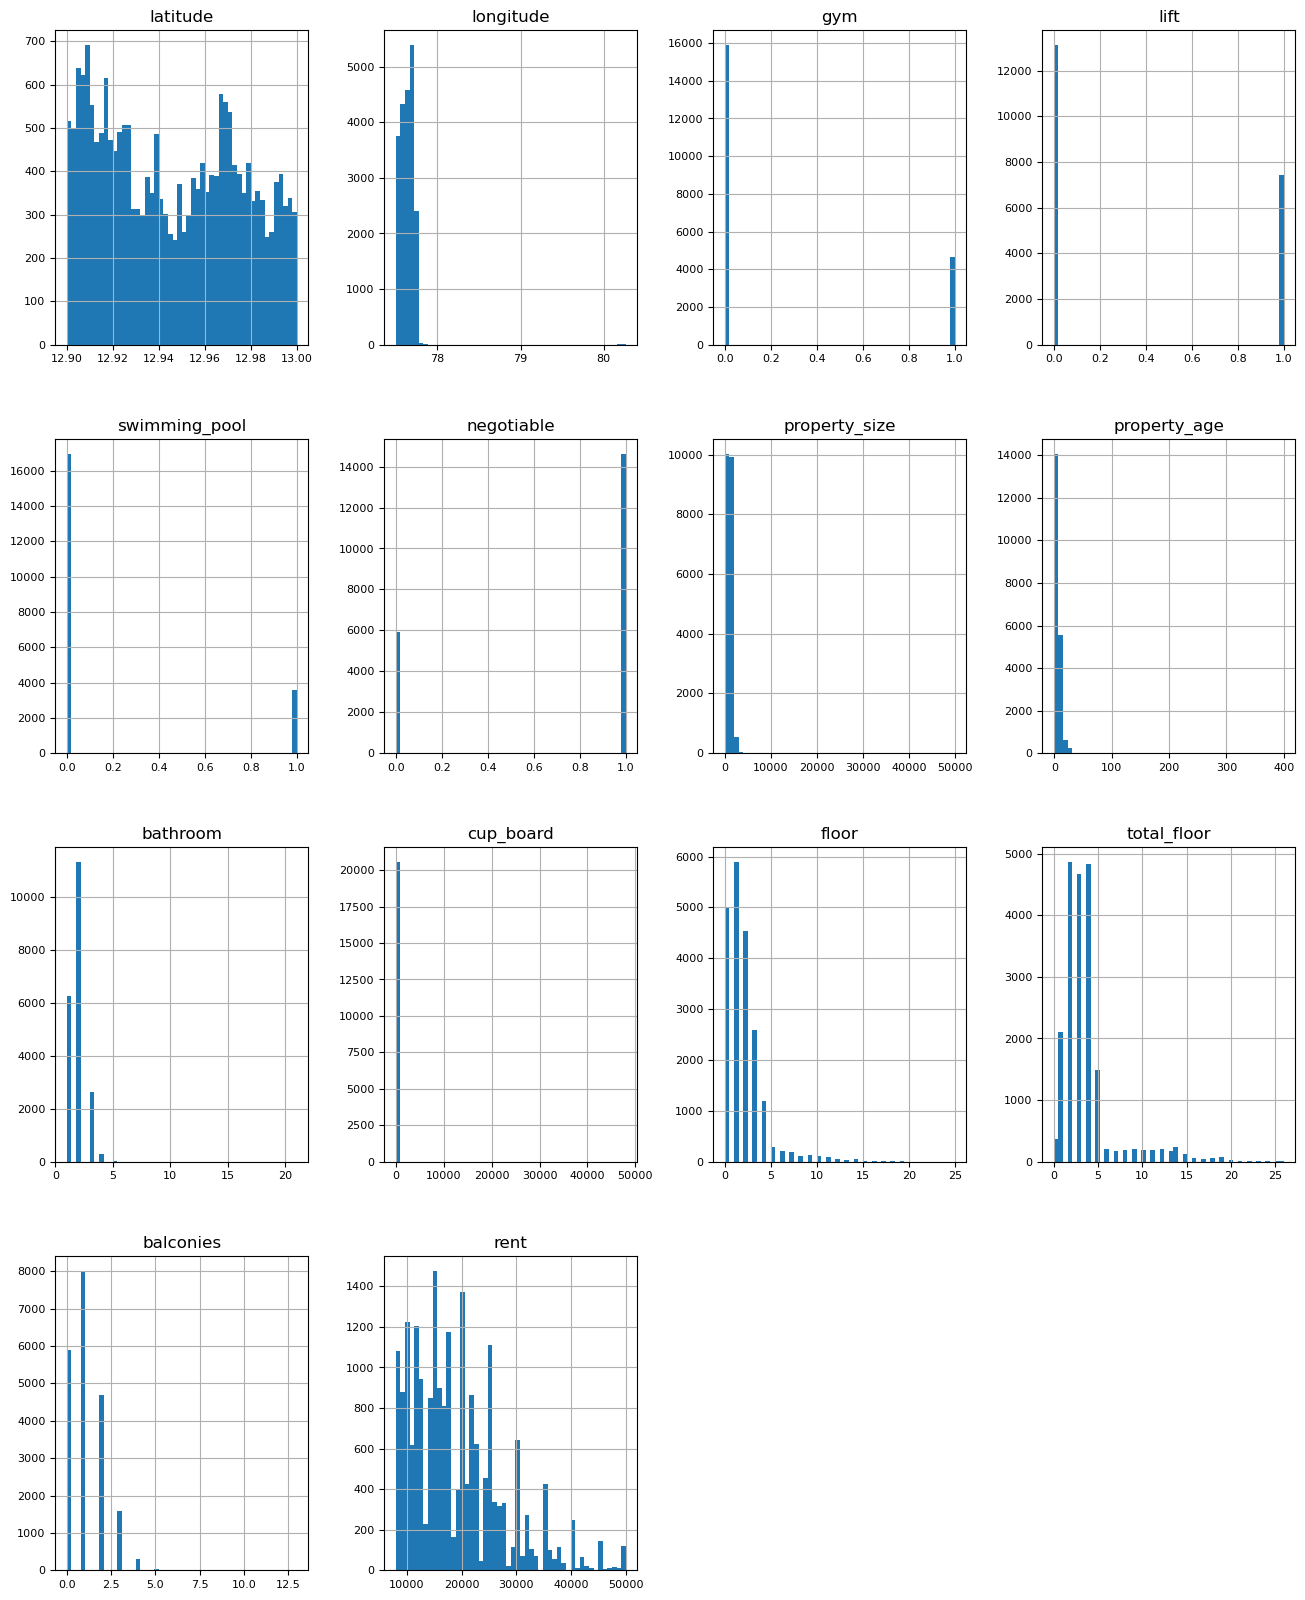

In [4]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  float64
 8   lift             20555 non-null  float64
 9   swimming_pool    20555 non-null  float64
 10  negotiable       20555 non-null  float64
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  float64
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [7]:
#chaking NA values 
data['activation_date'] = pd.to_datetime(data['activation_date'])
nan_counts_per_column = data.isna().sum()
print(nan_counts_per_column)

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64


In [8]:
# NA values %
nan_percentage_per_column = (data.isna().sum() / len(data)) * 100
print(nan_percentage_per_column)

id                 0.000000
type               0.131355
locality           0.778399
activation_date    0.111895
latitude           0.111895
longitude          0.111895
lease_type         0.111895
gym                0.000000
lift               0.000000
swimming_pool      0.000000
negotiable         0.000000
furnishing         0.000000
parking            0.000000
property_size      0.000000
property_age       0.111895
bathroom           0.111895
facing             0.111895
cup_board          0.111895
floor              0.111895
total_floor        0.111895
amenities          0.111895
water_supply       0.111895
building_type      0.111895
balconies          0.111895
rent               0.111895
dtype: float64


In [9]:
#Fill Na Values with mode and median
columns_cata = ['type', 'locality', 'activation_date', 'lease_type', 'furnishing', 'facing', 'amenities', 'water_supply', 'building_type','parking']

for col in columns_cata:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)
columns_int=set(data.columns) - set(columns_cata) - set(['id'])
for col in columns_int:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)


In [10]:
# NA values %
nan_percentage_per_column = (data.isna().sum() / len(data)) * 100
print(nan_percentage_per_column)

id                 0.0
type               0.0
locality           0.0
activation_date    0.0
latitude           0.0
longitude          0.0
lease_type         0.0
gym                0.0
lift               0.0
swimming_pool      0.0
negotiable         0.0
furnishing         0.0
parking            0.0
property_size      0.0
property_age       0.0
bathroom           0.0
facing             0.0
cup_board          0.0
floor              0.0
total_floor        0.0
amenities          0.0
water_supply       0.0
building_type      0.0
balconies          0.0
rent               0.0
dtype: float64


In [11]:
#categorical variable
#Extract the amenities column and convert it from a JSON-like string to a dictionary
data['amenities'] = data['amenities'].apply(json.loads)
#Extract amenities and create new columns
amenities_list = ['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']
for amenity in amenities_list:
    data[amenity] = data['amenities'].apply(lambda x: 1 if amenity in x and x[amenity] else 0)
#Drop the original 'amenities' column if no longer needed
data.drop('amenities', axis=1, inplace=True)

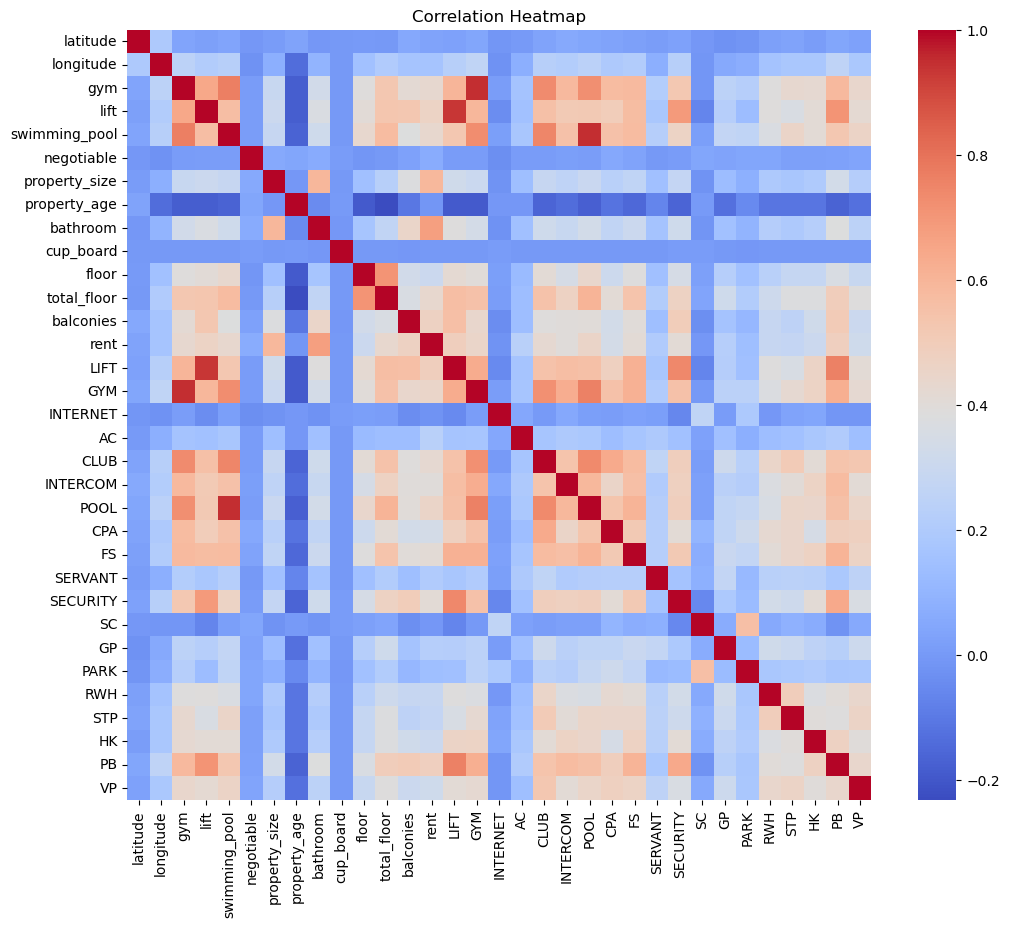

In [14]:
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Extract correlations with the target variable
target_correlations = correlation_matrix['rent'].sort_values(ascending=False)

print("Correlation with the target variable:")
print(target_correlations)


Correlation with the target variable:
rent             1.000000
bathroom         0.677390
property_size    0.588315
LIFT             0.490032
PB               0.483128
balconies        0.472221
lift             0.461437
POOL             0.453851
GYM              0.448649
total_floor      0.436968
swimming_pool    0.434263
gym              0.431120
CLUB             0.427005
SECURITY         0.412161
FS               0.410886
INTERCOM         0.396101
CPA              0.339661
VP               0.318468
HK               0.307470
floor            0.306242
RWH              0.286969
STP              0.274494
AC               0.235029
GP               0.224291
SERVANT          0.204210
longitude        0.163755
PARK             0.141179
negotiable       0.062429
latitude         0.032829
cup_board       -0.001245
SC              -0.009572
property_age    -0.010619
INTERNET        -0.021140
Name: rent, dtype: float64


In [56]:
data = pd.read_csv('no_commas_location.csv',index_col=False)
data.sample(10)

,Unnamed: 0,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
7249,7249,ff80818151669a40015180250fa54e4d,BHK2,Doddanekundi,2018-02-16 09:57:00,12.971877,77.695300,FAMILY,1.0,1.0,...,0,1,1,0,1,1,0,1,0,0
3118,3118,ff808181639be5140163a2019f417f28,BHK2,Doddanekkundi,2018-07-29 19:41:00,12.977272,77.679756,ANYONE,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
16200,16200,ff808181577fe2c60157850f49dc0e88,RK1,Koramangala,2017-11-21 15:15:00,12.928461,77.632793,ANYONE,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4306,4306,ff808181597a44b501597d9f1bac24c8,BHK2,Panathur,2018-06-22 19:05:00,12.936200,77.705575,ANYONE,1.0,1.0,...,0,1,1,0,1,0,0,1,1,0
17536,17536,ff8081815fa638b3015fa9b8c74e1e3f,BHK2,Kumaraswamy Layout,2017-11-11 13:09:00,12.905185,77.562918,FAMILY,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
6994,6994,ff8081815e756939015e79a3529a650b,BHK2,JP Nagar 1st Phase,2017-09-13 12:17:00,12.907097,77.573176,ANYONE,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
18738,18738,ff808181633a5aa701633b2e53803872,BHK2,Marathahalli,2018-08-05 10:24:00,12.955090,77.703055,FAMILY,1.0,1.0,...,0,1,0,0,1,1,1,1,1,0
2539,2539,ff8081816035b0e50160369423b02bbd,BHK1,HSR Layout 5th Sector,2018-04-01 17:45:00,12.917139,77.629556,FAMILY,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
19329,19329,ff8081815511306d0155162515f1438e,BHK2,Munnekollal,2017-06-09 16:01:00,12.944898,77.708082,ANYONE,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20435,20435,ff8081815e7a0b30015e7b4995132c5f,BHK3,Banashankari,2017-09-13 19:24:00,12.938951,77.560433,FAMILY,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0


In [57]:
#drop when corr value < 0.1 with rent data set
columns_to_drop=['negotiable','cup_board','SC','property_age','INTERNET']
df=data.drop(columns=columns_to_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20555 non-null  int64  
 1   id               20555 non-null  object 
 2   type             20555 non-null  object 
 3   locality         20555 non-null  object 
 4   activation_date  20555 non-null  object 
 5   latitude         20555 non-null  float64
 6   longitude        20555 non-null  float64
 7   lease_type       20555 non-null  object 
 8   gym              20555 non-null  float64
 9   lift             20555 non-null  float64
 10  swimming_pool    20555 non-null  float64
 11  negotiable       20555 non-null  float64
 12  furnishing       20555 non-null  object 
 13  parking          20555 non-null  object 
 14  property_size    20555 non-null  float64
 15  property_age     20555 non-null  float64
 16  bathroom         20555 non-null  float64
 17  facing      

In [58]:
# calculate Age and drop the date time
current_date = datetime.today()
df['activation_date']=pd.to_datetime(data['activation_date'])
df['age_of_property'] = (current_date - df['activation_date']).dt.days // 365
df.drop(columns=['activation_date'],inplace=True)
df.columns

Index(['Unnamed: 0', 'id', 'type', 'locality', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'furnishing', 'parking',
       'property_size', 'bathroom', 'facing', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'LIFT', 'GYM',
       'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP', 'age_of_property'],
      dtype='object')

In [59]:
#drop high correlated value > 0.8
df.drop(columns=['lift','gym','swimming_pool'],inplace=True)

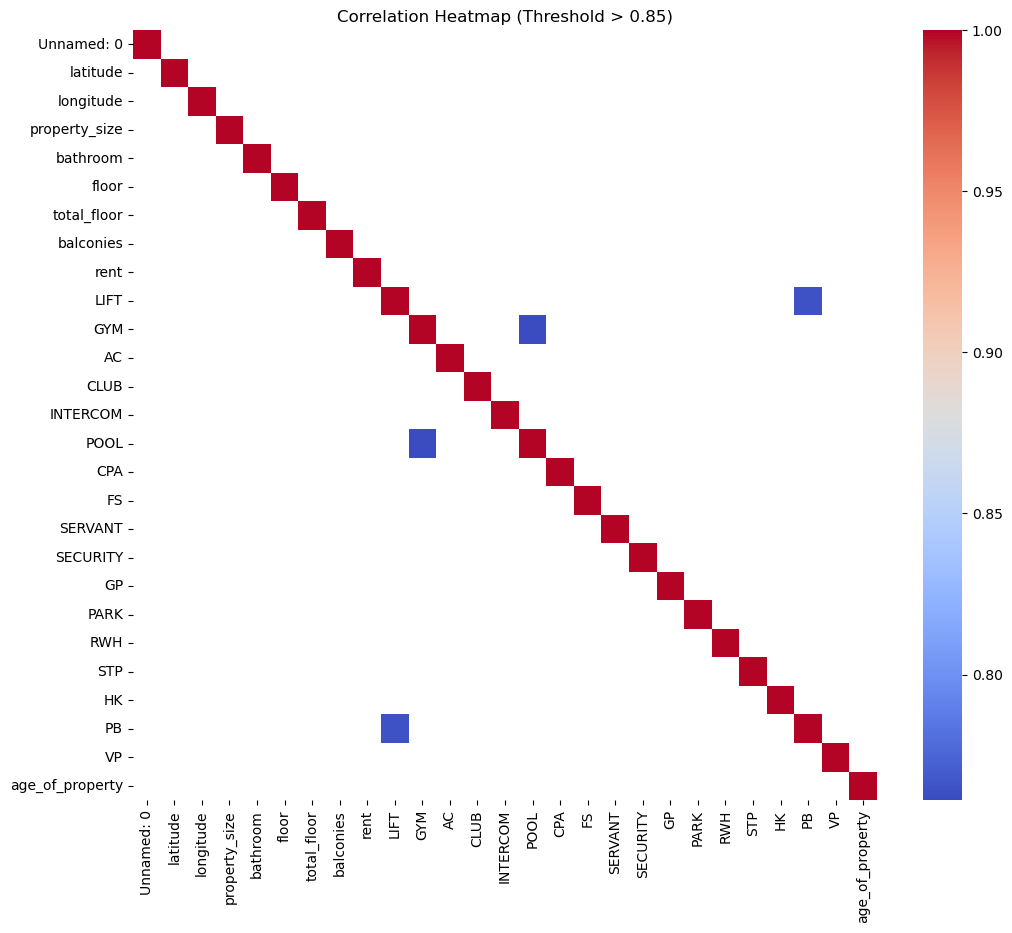

In [60]:
correlation_matrix = df.corr()
# Filter correlation values based on the threshold
threshold = 0.75
filtered_corr_matrix = correlation_matrix[abs(correlation_matrix) > threshold]

# Plot a heatmap of the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap (Threshold > 0.85)")
plt.show()

In [61]:
df.shape

(20555, 36)

In [62]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20555 non-null  object 
 2   locality         20555 non-null  object 
 3   latitude         20555 non-null  float64
 4   longitude        20555 non-null  float64
 5   lease_type       20555 non-null  object 
 6   furnishing       20555 non-null  object 
 7   parking          20555 non-null  object 
 8   property_size    20555 non-null  float64
 9   bathroom         20555 non-null  float64
 10  facing           20555 non-null  object 
 11  floor            20555 non-null  float64
 12  total_floor      20555 non-null  float64
 13  water_supply     20555 non-null  object 
 14  building_type    20555 non-null  object 
 15  balconies        20555 non-null  float64
 16  rent             20555 non-null  float64
 17  LIFT        

# Chcek Column by column for outliers 

In [63]:
df['type'].value_counts()

BHK2        11705
BHK3         4388
BHK1         3613
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [64]:
df['type'] = df['type'].replace('1BHK1', 'BHK1')
df['type'] = df['type'].replace('bhk2', 'BHK2')
df['type'] = df['type'].replace('bhk3', 'BHK3')
df['type'].value_counts()


BHK2        11721
BHK3         4400
BHK1         3617
RK1           553
BHK4          233
BHK4PLUS       31
Name: type, dtype: int64

In [65]:
df['lease_type'].value_counts()

FAMILY      10213
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: lease_type, dtype: int64

In [66]:
df['furnishing'].value_counts()

SEMI_FURNISHED     17950
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

In [67]:
df['parking'].value_counts()

BOTH            10841
TWO_WHEELER      7224
FOUR_WHEELER     1448
NONE             1042
Name: parking, dtype: int64

In [68]:
df['water_supply'].value_counts()

CORP_BORE      10732
CORPORATION     6729
BOREWELL        3094
Name: water_supply, dtype: int64

In [69]:
df['building_type'].value_counts()

IF    9263
AP    8876
IH    2399
GC      17
Name: building_type, dtype: int64

In [70]:
df['type'].value_counts()

BHK2        11721
BHK3         4400
BHK1         3617
RK1           553
BHK4          233
BHK4PLUS       31
Name: type, dtype: int64

In [71]:
# Group by 'locality' and count occurrences
locality_counts = df.groupby('locality').size()

# Create a boolean mask to filter rows with repeating unique values
repeating_unique_mask = df['locality'].map(locality_counts) > 20

# Filter the DataFrame to keep only rows wit
df = df[repeating_unique_mask]

In [72]:
df['locality'].value_counts()

Whitefield              1502
HSR Layout               797
Banashankari             746
Bellandur                619
Marathahalli             527
                        ... 
Chikkakannalli            22
Hanumanthnagar            21
Thirumalashettyhally      21
Yemalur                   21
GM Palya                  21
Name: locality, Length: 135, dtype: int64

In [28]:
df.shape

(18932, 35)

In [73]:
label_encoder = LabelEncoder()
# For lease_type
df['lease_type_encoded'] = label_encoder.fit_transform(df['lease_type'])
# Drop the original 'lease_type' column
df.drop(columns=['lease_type'], inplace=True)

#
df['furnishing_encoded'] = label_encoder.fit_transform(df['furnishing'])
df.drop(columns=['furnishing'], inplace=True)

#
df['parking_encoded'] = label_encoder.fit_transform(df['parking'])
df.drop(columns=['parking'], inplace=True)

#
df['water_supply_encoded'] = label_encoder.fit_transform(df['water_supply'])
df.drop(columns=['water_supply'], inplace=True)

#
df['building_type_encoded'] = label_encoder.fit_transform(df['building_type'])
df.drop(columns=['building_type'], inplace=True)

#
df['BHK_type_encoded'] = label_encoder.fit_transform(df['type'])
df.drop(columns = ['type'], inplace=True)
df['locality_encoded'] = label_encoder.fit_transform(df['locality'])
df.drop(columns = ['locality'], inplace=True)

In [74]:
df.head()

,id,latitude,longitude,property_size,bathroom,facing,floor,total_floor,balconies,rent,...,PB,VP,age_of_property,lease_type_encoded,furnishing_encoded,parking_encoded,water_supply_encoded,building_type_encoded,BHK_type_encoded,locality_encoded
0,ff8081815733a243015733b2876600a6,12.934471,77.634471,1250.0,2.0,E,6.0,12.0,2.0,40000.0,...,1,1,5,3,2,0,2,0,1,131
1,ff8081815ee25e15015ee50004da2acd,12.929557,77.672280,1400.0,2.0,NE,3.0,4.0,2.0,22000.0,...,1,1,5,0,2,0,1,0,1,19
3,ff80818164b68a700164b74b1b247a1d,12.955991,77.531634,600.0,1.0,E,1.0,2.0,0.0,8000.0,...,0,0,5,3,2,3,1,3,0,4
4,ff80818163b1faf00163b4b9b8a163b1,12.963903,77.649446,1500.0,3.0,E,0.0,0.0,1.0,45000.0,...,0,1,5,3,2,0,1,3,2,73
5,ff8081815f48e4aa015f4dd1a9c6696b,12.986196,77.718314,1080.0,2.0,E,3.0,5.0,2.0,18000.0,...,1,0,5,3,2,0,2,0,0,51


In [75]:
df['property_size'].value_counts()

1200.0    1571
600.0     1241
1000.0    1122
800.0      920
1100.0     805
          ... 
582.0        1
1617.0       1
1219.0       1
1269.0       1
415.0        1
Name: property_size, Length: 1097, dtype: int64

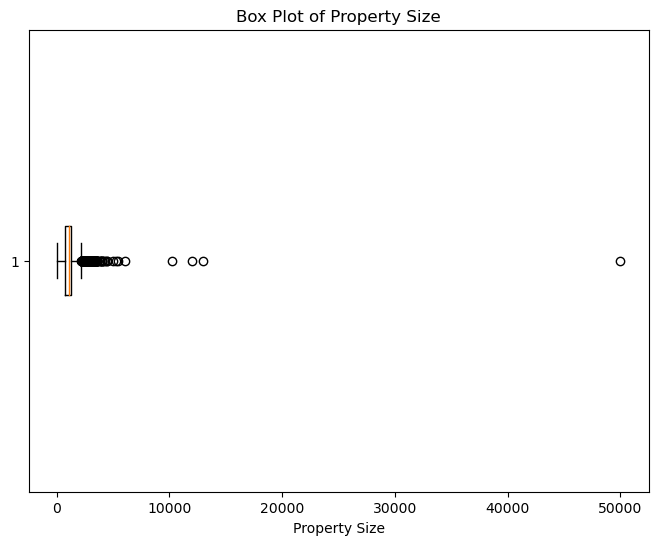

In [33]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['property_size'], vert=False)
plt.title('Box Plot of Property Size')
plt.xlabel('Property Size')
plt.show()

In [76]:
# Remove the outliers
Q1 = df['property_size'].quantile(0.25)
Q3 = df['property_size'].quantile(0.75)
IQR = Q3 - Q1
#Identify and print outliers 
df = df[(df['property_size'] >= Q1 - 1.5 * IQR) & (df['property_size'] <= Q3 + 1.5 * IQR)]

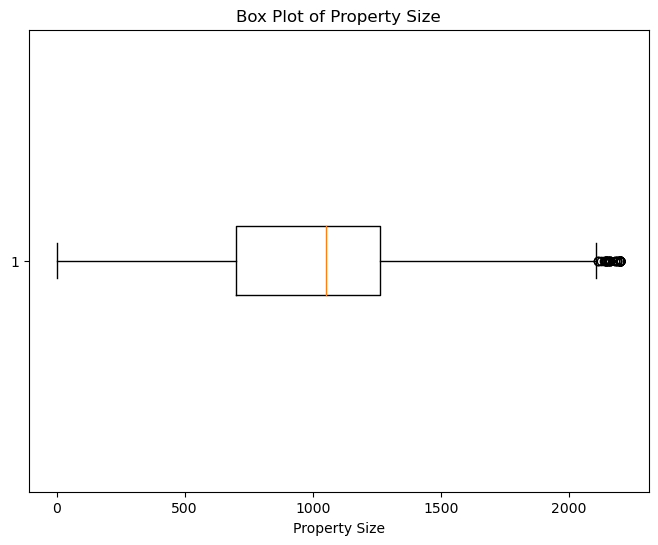

In [77]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['property_size'], vert=False)
plt.title('Box Plot of Property Size')
plt.xlabel('Property Size')
plt.show()

In [78]:
df['bathroom'].value_counts()

2.0     9921
1.0     5381
3.0     2224
4.0      135
5.0        5
21.0       1
Name: bathroom, dtype: int64

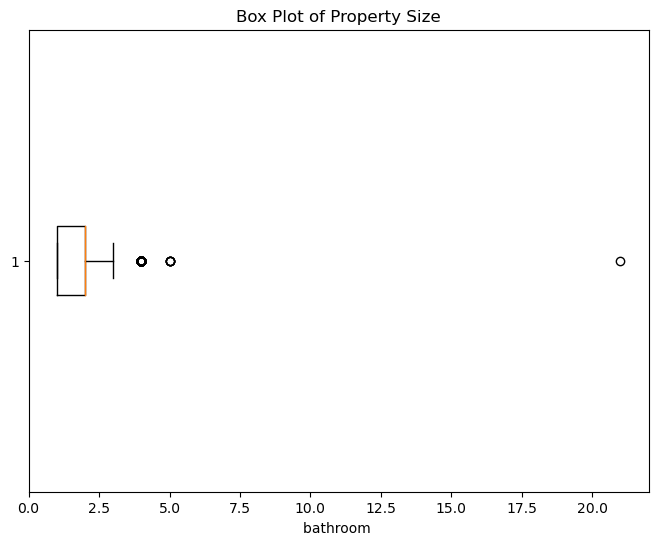

In [79]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['bathroom'], vert=False)
plt.title('Box Plot of Property Size')
plt.xlabel('bathroom ')
plt.show()

In [80]:
df[['bathroom','rent']].groupby(['bathroom']).mean()

,rent
bathroom,
1.0,12180.735551
2.0,20053.154924
3.0,29102.111511
4.0,34170.370370
5.0,34000.000000
21.0,27000.000000


## Facing

In [81]:
df['facing'].value_counts()

E     8264
N     5042
W     2300
S     1013
NE     709
SE     163
NW     126
SW      50
Name: facing, dtype: int64

In [82]:
df[['facing','rent']].groupby(['facing']).mean()

,rent
facing,
E,18937.869555
N,17731.770131
NE,21456.623413
NW,21654.761905
S,18443.139191
SE,21407.668712
SW,23550.000000
W,20359.890870


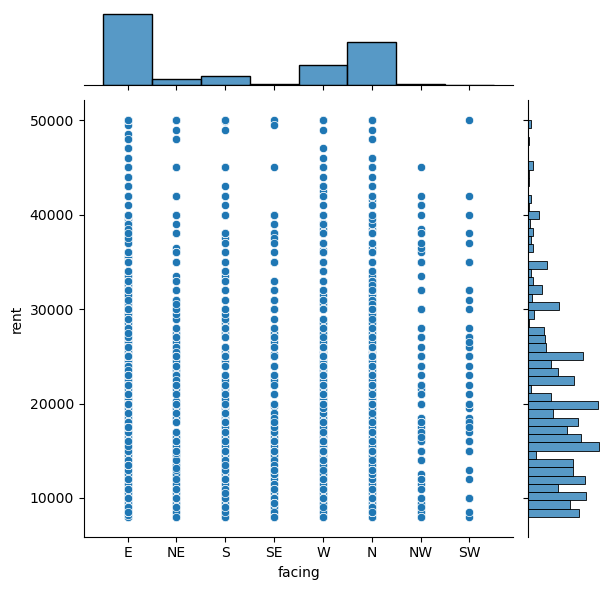

In [83]:
sns.jointplot(x = 'facing', y = 'rent', data = df)

In [100]:
label_encoder = LabelEncoder()
df['facing_encoded'] = label_encoder.fit_transform(df['facing'])
df.drop(columns=['facing'], inplace=True)

In [85]:
df['floor'].value_counts()

1.0     5102
0.0     4136
2.0     3914
3.0     2284
4.0     1061
5.0      263
6.0      179
7.0      158
9.0      116
8.0      108
10.0      92
11.0      78
12.0      53
14.0      39
13.0      29
15.0      17
16.0      16
17.0       8
19.0       5
18.0       4
20.0       3
25.0       1
22.0       1
Name: floor, dtype: int64

<AxesSubplot:xlabel='floor', ylabel='Count'>

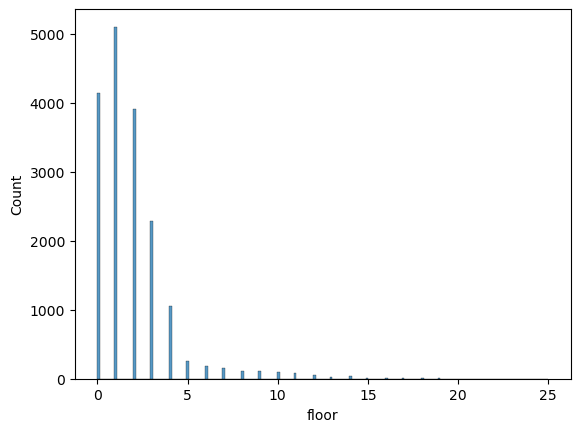

In [86]:
sns.histplot(data=df, x="floor")

In [87]:
df['total_floor'].value_counts()

4.0     4307
3.0     4024
2.0     4014
1.0     1714
5.0     1365
0.0      281
14.0     224
9.0      189
12.0     185
6.0      185
8.0      168
10.0     167
11.0     166
13.0     163
7.0      149
15.0     111
16.0      63
19.0      59
18.0      48
17.0      32
20.0      20
21.0      11
23.0       8
24.0       6
25.0       4
22.0       2
26.0       2
Name: total_floor, dtype: int64

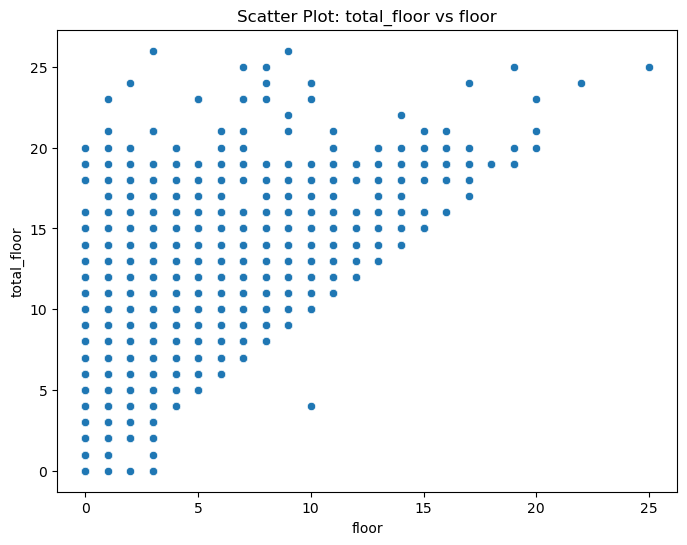

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['floor'], y=df['total_floor'])
plt.title("Scatter Plot: {} vs {}".format('total_floor', 'floor'))
plt.xlabel('floor')
plt.ylabel('total_floor')
plt.show()

In [89]:
df['balconies'].value_counts()

1.0     6927
0.0     4933
2.0     4153
3.0     1383
4.0      243
5.0       25
13.0       1
6.0        1
10.0       1
Name: balconies, dtype: int64

In [90]:
df.drop(columns = ['id'], inplace=True)

In [91]:
df.shape

(17667, 34)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17667 entries, 0 to 20554
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               17667 non-null  float64
 1   longitude              17667 non-null  float64
 2   property_size          17667 non-null  float64
 3   bathroom               17667 non-null  float64
 4   floor                  17667 non-null  float64
 5   total_floor            17667 non-null  float64
 6   balconies              17667 non-null  float64
 7   rent                   17667 non-null  float64
 8   LIFT                   17667 non-null  int64  
 9   GYM                    17667 non-null  int64  
 10  AC                     17667 non-null  int64  
 11  CLUB                   17667 non-null  int64  
 12  INTERCOM               17667 non-null  int64  
 13  POOL                   17667 non-null  int64  
 14  CPA                    17667 non-null  int64  
 15  FS

In [93]:
df.describe()

,latitude,longitude,property_size,bathroom,floor,total_floor,balconies,rent,LIFT,GYM,...,PB,VP,age_of_property,lease_type_encoded,furnishing_encoded,parking_encoded,water_supply_encoded,building_type_encoded,BHK_type_encoded,locality_encoded
count,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,...,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000,17667.000000
mean,12.945511,77.637230,1035.396219,1.838512,1.906775,3.871229,1.160808,18906.717836,0.409577,0.256127,...,0.377200,0.244184,5.048622,1.521028,1.816890,1.209883,1.367578,1.208638,1.153110,65.924209
std,0.029318,0.071526,404.911914,0.676726,2.201029,3.189530,0.980916,8031.712341,0.491770,0.436505,...,0.484699,0.429615,0.471852,1.478801,0.516162,1.388518,0.737128,1.132483,0.910424,40.881470
min,12.900004,77.500177,1.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.918288,77.574020,700.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,26.000000
50%,12.943465,77.637235,1050.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,66.000000
75%,12.970715,77.698906,1263.000000,2.000000,3.000000,4.000000,2.000000,24000.000000,1.000000,1.000000,...,1.000000,0.000000,5.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,99.000000
max,12.999999,77.852451,2200.000000,21.000000,25.000000,26.000000,13.000000,50000.000000,1.000000,1.000000,...,1.000000,1.000000,6.000000,3.000000,2.000000,3.000000,2.000000,3.000000,5.000000,134.000000


In [97]:
df.isnull().sum()

latitude                 0
longitude                0
property_size            0
bathroom                 0
facing                   0
floor                    0
total_floor              0
balconies                0
rent                     0
LIFT                     0
GYM                      0
AC                       0
CLUB                     0
INTERCOM                 0
POOL                     0
CPA                      0
FS                       0
SERVANT                  0
SECURITY                 0
GP                       0
PARK                     0
RWH                      0
STP                      0
HK                       0
PB                       0
VP                       0
age_of_property          0
lease_type_encoded       0
furnishing_encoded       0
parking_encoded          0
water_supply_encoded     0
building_type_encoded    0
BHK_type_encoded         0
locality_encoded         0
dtype: int64

# Model Building

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import Adam
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

# Load your dataset

# Preprocessing
# Handle missing values, encode categorical variables, etc.

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['rent'])
y = df['rent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression (L2)
lin_reg = Ridge(alpha=1.0)
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Linear Regression (L1)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso_reg = lasso_reg.predict(X_test_scaled)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly_reg = poly_reg.predict(X_test_poly)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

# XGBoost
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_scaled)

# Artificial Neural Networks (ANN)
# ann_model = Sequential()
# ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
# ann_model.add(Dense(units=64, activation='relu'))
# ann_model.add(Dense(units=1))
# ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
# y_pred_ann = ann_model.predict(X_test_scaled)

# Support Vector Machines (SVM)
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_scaled, y_train)
y_pred_svm_reg = svm_reg.predict(X_test_scaled)

# Ensemble Learning (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('lin_reg', lin_reg),
    ('lasso_reg', lasso_reg),
    ('rf_reg', rf_reg),
    ('xgb_reg', xgb_reg),
    ('svm_reg', svm_reg)
])
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate Models
print("Linear Regression (L2) - RMSE:", mean_squared_error(y_test, y_pred_lin_reg, squared=False))
print("Linear Regression (L1) - RMSE:", mean_squared_error(y_test, y_pred_lasso_reg, squared=False))
print("Polynomial Regression - RMSE:", mean_squared_error(y_test, y_pred_poly_reg, squared=False))
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf_reg, squared=False))
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb_reg, squared=False))
#print("Artificial Neural Networks - RMSE:", mean_squared_error(y_test, y_pred_ann, squared=False))
print("Support Vector Machines - RMSE:", mean_squared_error(y_test, y_pred_svm_reg, squared=False))
print("Ensemble Learning (Voting Regressor) - RMSE:", mean_squared_error(y_test, y_pred_ensemble, squared=False))



Linear Regression (L2) - RMSE: 4580.715770892365
Linear Regression (L1) - RMSE: 4580.693333029902
Polynomial Regression - RMSE: 4797.908456974728
Random Forest - RMSE: 3532.258016077102
XGBoost - RMSE: 3416.8371565033276
Support Vector Machines - RMSE: 4828.157457077213
Ensemble Learning (Voting Regressor) - RMSE: 3899.4484688600865


In [103]:
r2_score(y_test, y_pred_xgb_reg)

0.8180867783402497

In [112]:
xgb_reg = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_scaled)
r2_score(y_test, y_pred_xgb_reg)

0.8238001314893116

0.8068464937860642